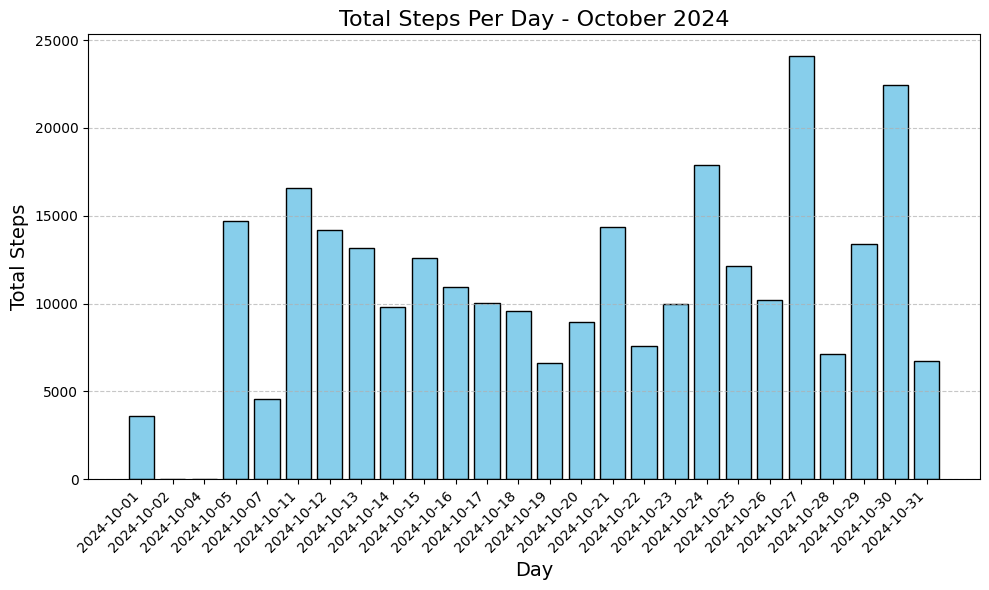

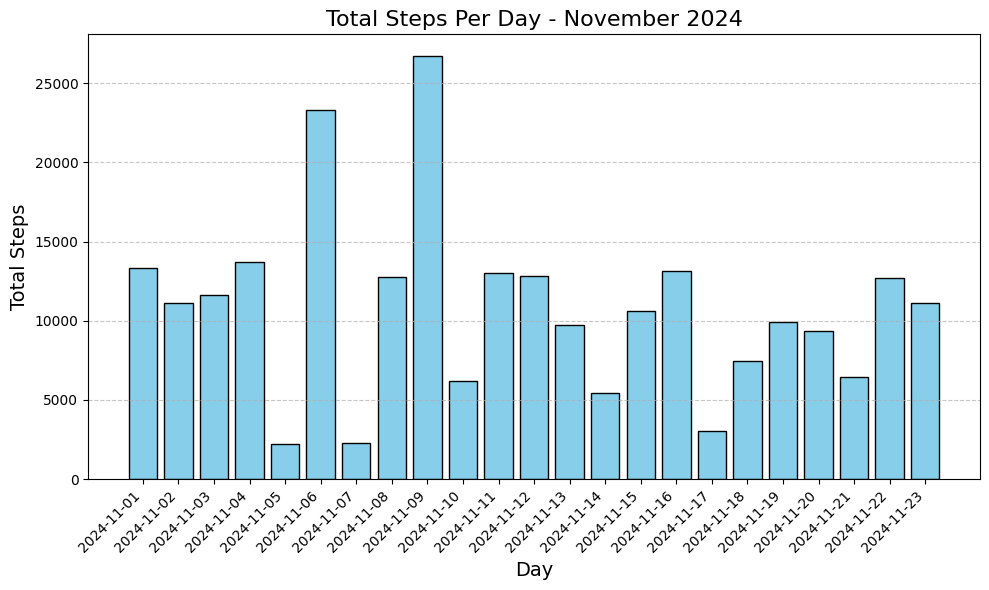

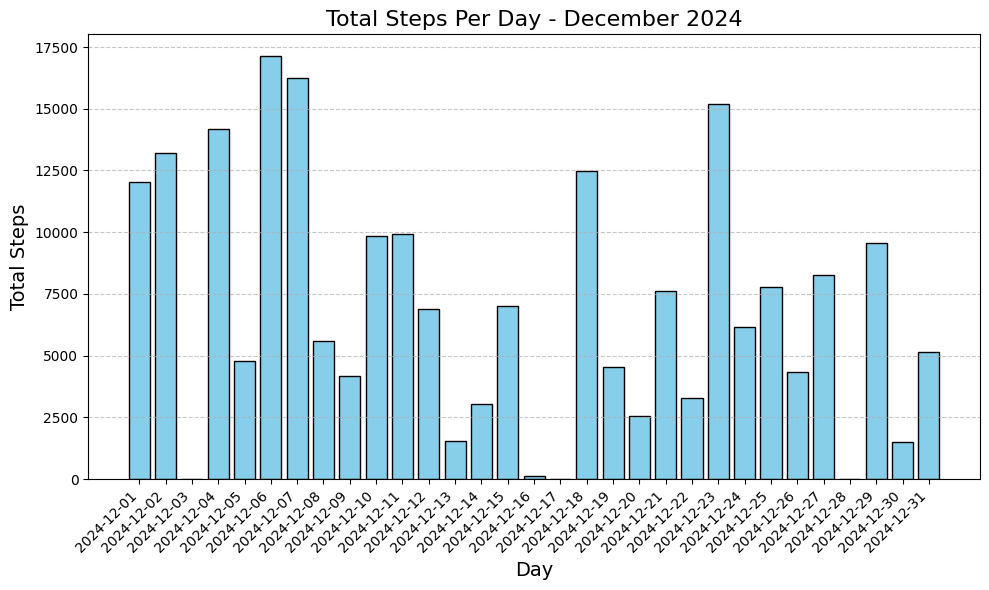

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the file paths to your JSON files
file_paths = [
    "../Data/FitBit/Global Export Data/steps-2024-07-11.json",
    "../Data/FitBit/Global Export Data/steps-2024-08-10.json",
    "../Data/FitBit/Global Export Data/steps-2024-09-09.json",
    "../Data/FitBit/Global Export Data/steps-2024-10-09.json",
    "../Data/FitBit/Global Export Data/steps-2024-11-08.json",
    "../Data/FitBit/Global Export Data/steps-2024-12-08.json"
]

# Combine all the JSON files into a single DataFrame
dataframes = []
for file_path in file_paths:
    df = pd.read_json(file_path)
    dataframes.append(df)

# Combine all data
combined_data = pd.concat(dataframes, ignore_index=True)

# Convert dateTime to datetime format
combined_data['dateTime'] = pd.to_datetime(combined_data['dateTime'])

# Extract year-month and day
combined_data['year_month'] = combined_data['dateTime'].dt.to_period('M')
combined_data['day'] = combined_data['dateTime'].dt.to_period('D')

# Convert 'value' to numeric
combined_data['value'] = pd.to_numeric(combined_data['value'], errors='coerce')

# Aggregate total steps per day
steps_per_day = combined_data.groupby(['year_month', 'day'])['value'].sum().reset_index()

# Dictionary for month names
month_names = {
    '2024-10': 'October',
    '2024-11': 'November',
    '2024-12': 'December'
}

# Plot for each month (October, November, December)
for month in ['2024-10', '2024-11', '2024-12']:
    month_data = steps_per_day[steps_per_day['year_month'] == pd.Period(month)]
    plt.figure(figsize=(10, 6))
    plt.bar(month_data['day'].dt.strftime('%Y-%m-%d'), month_data['value'], color='skyblue', edgecolor='black')
    plt.title(f'Total Steps Per Day - {month_names[month]} 2024', fontsize=16)
    plt.xlabel('Day', fontsize=14)
    plt.ylabel('Total Steps', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
